# Optimization Code: Streamlined for Easier Understanding & Variable Consistancy

In [1]:
import GraphsKey
import numpy as np
import FilterGrids
import Reflected_Spectra_grid as Reflected_Spectra
import PICASO_Climate_grid
import Photochem_grid
import OptimizeReflectedLightSpectrum as Optimize
import matplotlib.pyplot as plt
import h5py

import picaso.justdoit as jdi
import picaso.justplotit as jpi
import copy
import pandas as pd

import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt

import pickle

Steps Towards Optimization (Do BEFORE calling this function):
1. Calculate fpfs and wv of earth using Reflected_Spectra.make_case_earth function
2. fpfs_dict = calc_objective_dict(wv_earth, fpfs_earth, resolution=5)
3. minNep_inputs, fpfs_values_min, index_min = graph_vec_norm_fpfs(fpfs_dict=None, tol=None, full_plot=True) to limit what input values you wish to investigate further based on their objective calculation via the vector norm method.
4. Make sure that you have the earth_diff_phases.pkl file in your directory, if not run the calc_RSM_earth_phases(df_mol_earth=None, phase_earth=None, earth_RSM_dict={}, earth_type='Archean') function for both Archean and Modern specs. Run it for one first, then provide the output as the earth_type input to add another type to the dictionary.

What this function calls:
1. graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=None, minNep_inputs=None, limit_input=30, type_earth='Modern') is what will plot your list of filtered inputs of the mini_Neptune against the different phases of the Earth Spectrum.
2. graph_1v1_planet_comp(minNep_inputs, wv_earth, fpfs_earth, earth_type=None) will give you a one on one comparison to one of the phases of Earth with all inputted values for the mini-Neptune
3. graph_hist_input_comp(archean_earth_minNep_inputs, modern_earth_minNep_inputs) will give you a plot of the inputs which had matches that were found through optimization to modern or archean Earth.

## Solving for the atmosphere spectra of Modern & Archean Earth

In [2]:
## Modern Earth

df_mol_modern_earth = {
        "N2":0.79,
        "O2":0.21,
        "O3":7e-7,
        "H2O":3e-3,
        "CO2":300e-6,
        "CH4":1.7e-6
    }

res_modern_earth = Reflected_Spectra.make_case_earth(df_mol_earth=df_mol_modern_earth)

    pressure  temperature    N2    O2            O3    H2O     CO2       CH4
0   0.000001   274.163889  0.79  0.21  7.000000e-07  0.003  0.0003  0.000002
1   0.000001   274.163889  0.79  0.21  7.000000e-07  0.003  0.0003  0.000002
2   0.000001   274.163889  0.79  0.21  7.000000e-07  0.003  0.0003  0.000002
3   0.000002   274.163889  0.79  0.21  7.000000e-07  0.003  0.0003  0.000002
4   0.000002   274.163889  0.79  0.21  7.000000e-07  0.003  0.0003  0.000002
..       ...          ...   ...   ...           ...    ...     ...       ...
85  0.537449   262.910544  0.79  0.21  7.000000e-07  0.003  0.0003  0.000002
86  0.627701   270.360248  0.79  0.21  7.000000e-07  0.003  0.0003  0.000002
87  0.733109   278.021043  0.79  0.21  7.000000e-07  0.003  0.0003  0.000002
88  0.856218   285.898910  0.79  0.21  7.000000e-07  0.003  0.0003  0.000002
89  1.000000   294.000000  0.79  0.21  7.000000e-07  0.003  0.0003  0.000002

[90 rows x 8 columns]


In [3]:
## Archean Earth
df_mol_archean_earth = {
        "N2":0.945,
        "CO2":0.05,
        "CO":0.0005,
        "CH4":0.005, 
        "H2O":0.003
    }

res_archean_earth = Reflected_Spectra.make_case_earth(df_mol_earth=df_mol_archean_earth)

    pressure  temperature     N2   CO2      CO    CH4    H2O
0   0.000001   274.163889  0.945  0.05  0.0005  0.005  0.003
1   0.000001   274.163889  0.945  0.05  0.0005  0.005  0.003
2   0.000001   274.163889  0.945  0.05  0.0005  0.005  0.003
3   0.000002   274.163889  0.945  0.05  0.0005  0.005  0.003
4   0.000002   274.163889  0.945  0.05  0.0005  0.005  0.003
..       ...          ...    ...   ...     ...    ...    ...
85  0.537449   262.910544  0.945  0.05  0.0005  0.005  0.003
86  0.627701   270.360248  0.945  0.05  0.0005  0.005  0.003
87  0.733109   278.021043  0.945  0.05  0.0005  0.005  0.003
88  0.856218   285.898910  0.945  0.05  0.0005  0.005  0.003
89  1.000000   294.000000  0.945  0.05  0.0005  0.005  0.003

[90 rows x 7 columns]


In [4]:
wv_archean = res_archean_earth['all'][0]
fpfs_archean = res_archean_earth['all'][1]
alb_archean = res_archean_earth['all'][2]
wv_modern = res_modern_earth['all'][0]
fpfs_modern = res_modern_earth['all'][1]
alb_modern = res_modern_earth['all'][2]

## Optimization on Modern Earth

In [5]:
fpfs_dict_modern = Optimize.calc_objective_dict(wv_earth=wv_modern, fpfs_earth=fpfs_modern, resolution=5)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given

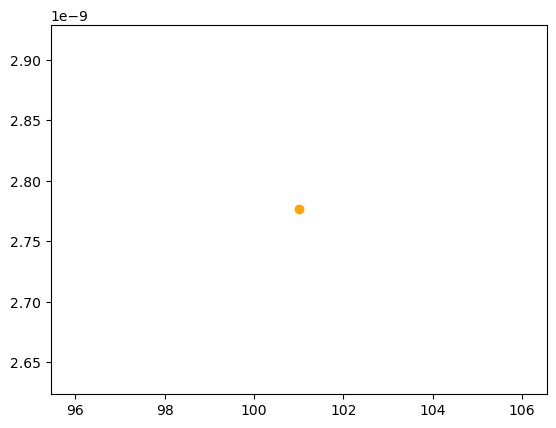

In [6]:
minNep_inputs_modern, fpfs_values_min_modern, index_min_modern = Optimize.graph_vec_norm_fpfs(fpfs_dict=fpfs_dict_modern, 
                                                                                              tol=.2777e-8, full_plot=False)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
 This is the length right before plotting mini Neptunes: (1, 1)


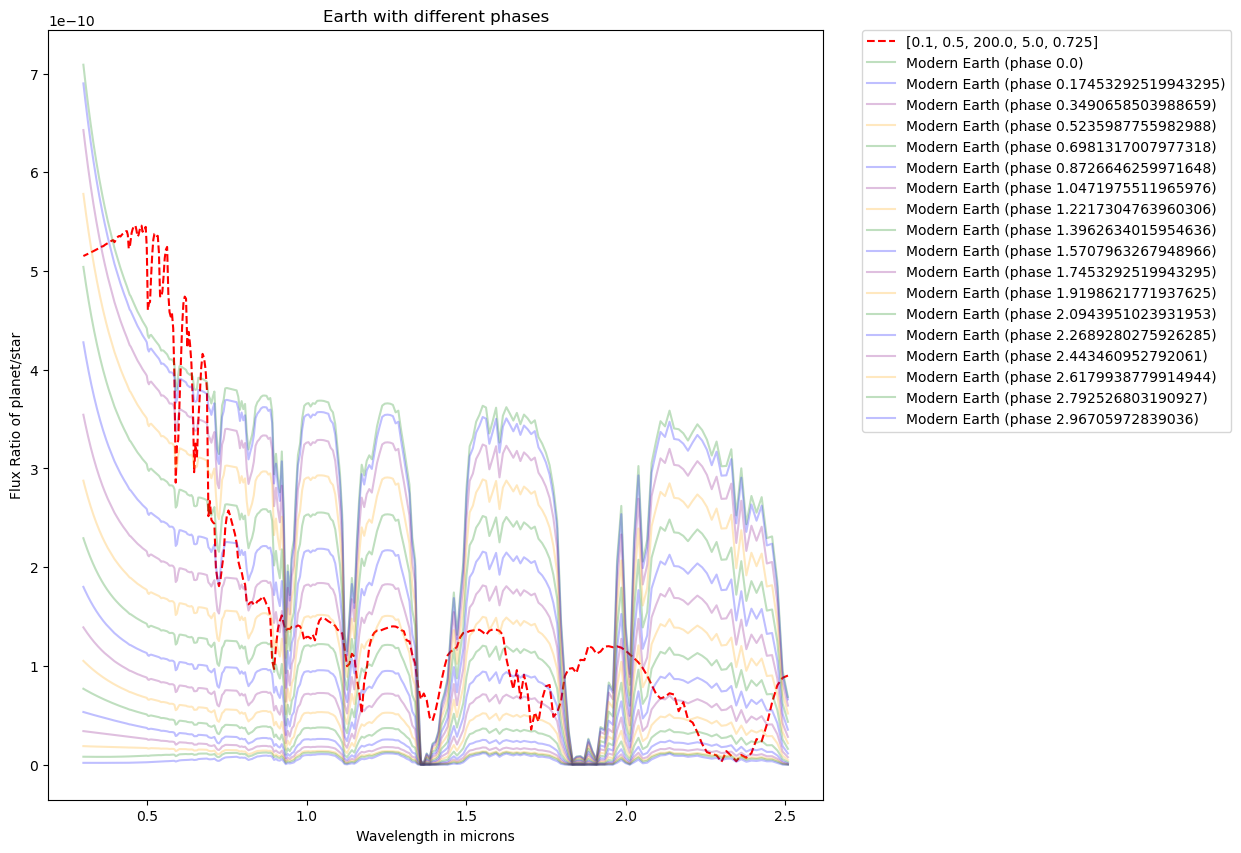

In [7]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_angle = phase_angle_list[:-1]

Optimize.graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=phase_angle, wv_earth_minNep=wv_modern,
                                    minNep_inputs_float=minNep_inputs_modern, limit_input=None, type_earth='Modern')

[0.1, 0.5, 200.0, 5.0, 0.725]
0.1 0.5 200 5 0.6981317007977318
3456 3456
Cases with clouds totaled: 3456
The nearest input in the grid found, [0.1, 0.5, 200, 5, 0.6981317007977318], did have clouds.
True
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flu

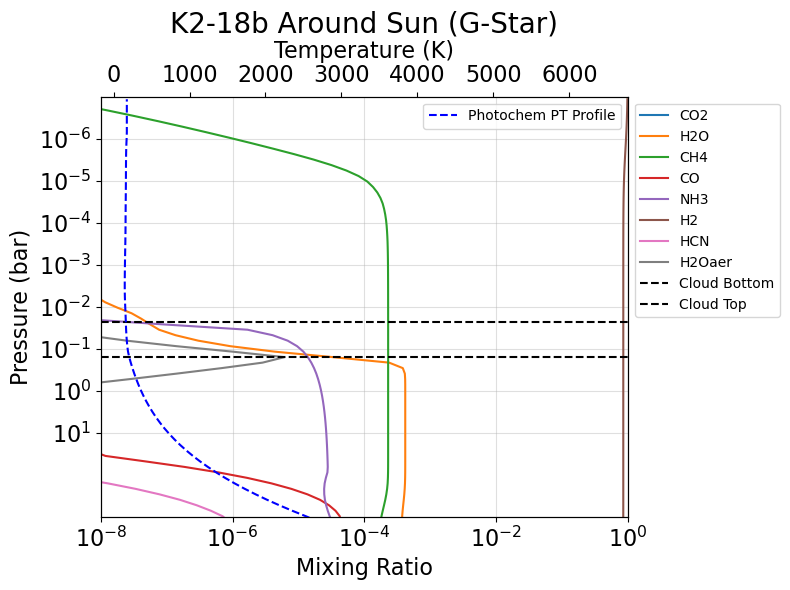

In [8]:
Optimize.plot_photochem_model_with_cloud(minNep_inputs=minNep_inputs_modern)

## Optimization on Archean Earth

In [9]:
fpfs_dict_archean = Optimize.calc_objective_dict(wv_earth=wv_archean, fpfs_earth=fpfs_archean, resolution=5)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given

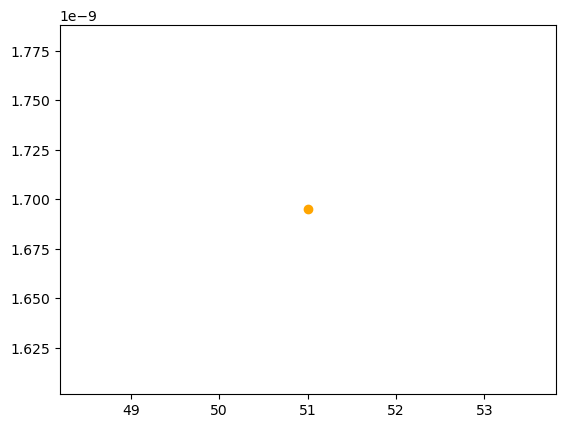

In [10]:
minNep_inputs_archean, fpfs_values_min_archean, index_min_archean = Optimize.graph_vec_norm_fpfs(fpfs_dict=fpfs_dict_archean, 
                                                                                                 tol=1.695e-9, full_plot=False)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
 This is the length right before plotting mini Neptunes: (1, 1)


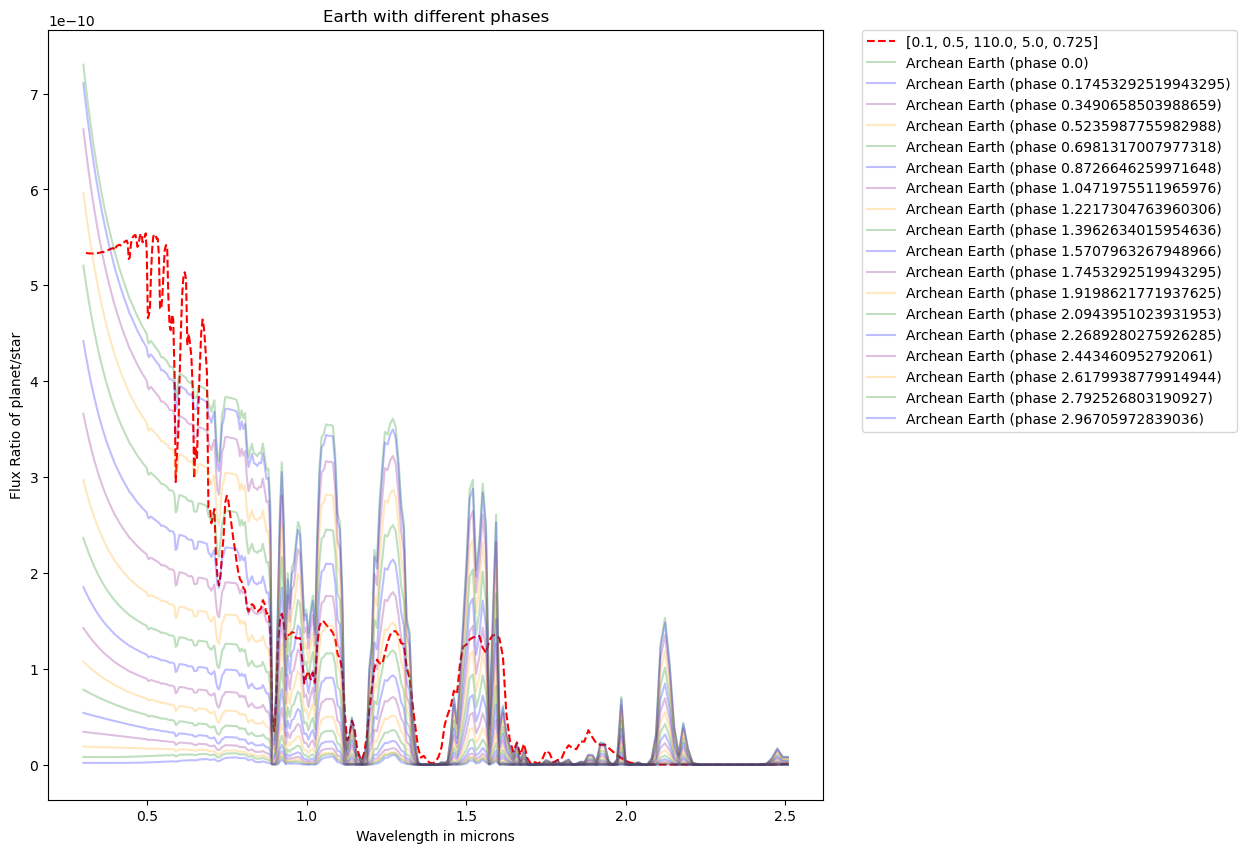

In [11]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_angle = phase_angle_list[:-1]

Optimize.graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=phase_angle, 
                                     wv_earth_minNep=wv_archean, minNep_inputs_float=minNep_inputs_archean, limit_input=None, type_earth='Archean')

[0.1, 0.5, 110.0, 5.0, 0.725]
0.1 0.5 100 5 0.6981317007977318
3456 3456
Cases with clouds totaled: 3456
The nearest input in the grid found, [0.1, 0.5, 100, 5, 0.6981317007977318], did have clouds.
True
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total 

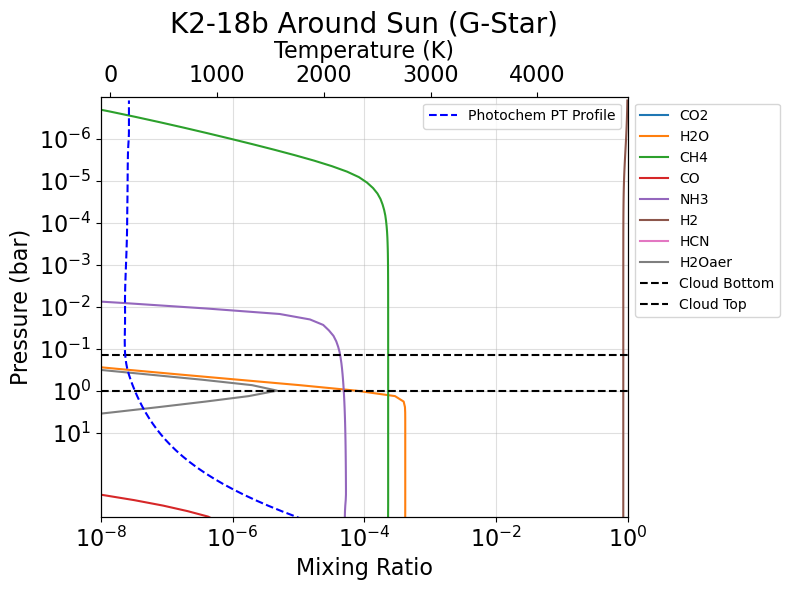

In [12]:
Optimize.plot_photochem_model_with_cloud(minNep_inputs=minNep_inputs_archean)

## Comparing Inputs from both methods that were optimized (histogram) - typically for comparing "optimized" graphs that are not the ultimate minimum.

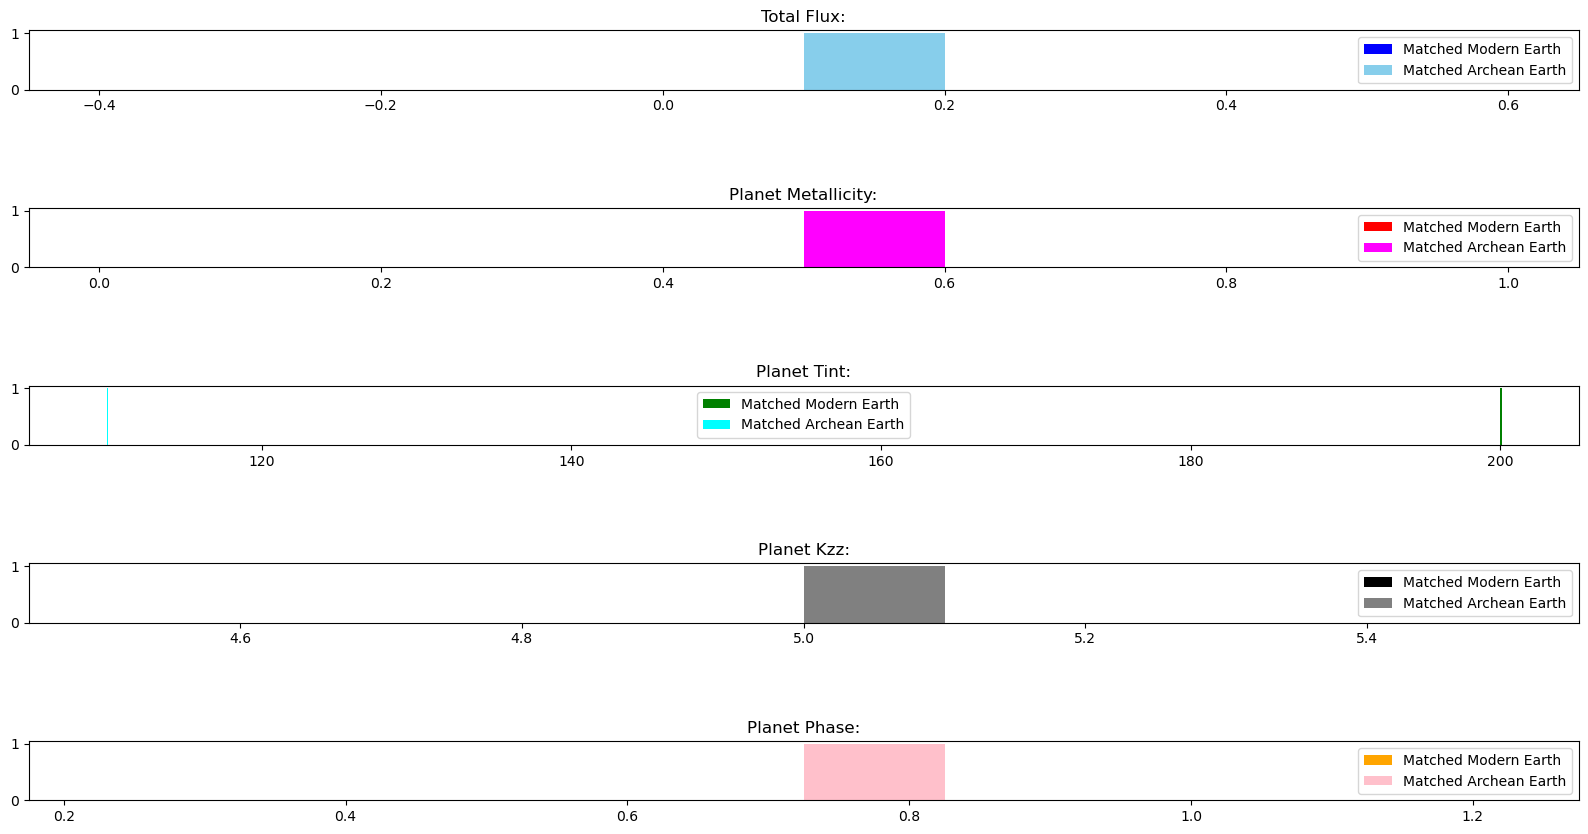

In [13]:
Optimize.graph_hist_input_comp(archean_earth_minNep_inputs_float=minNep_inputs_archean, modern_earth_minNep_inputs_float=minNep_inputs_modern) 

## Limiting output to single flux value (i.e. 1x Solar, same as Earth, more specifically Modern Earth)

### Modern Earth

In [14]:
fpfs_dict_modern_flux1 = Optimize.calc_objective_dict(wv_earth=wv_modern, fpfs_earth=fpfs_modern, resolution=5, total_flux_list=[1.0])

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given

In [15]:
minNep_inputs_modern_flux1, fpfs_values_min_modern_flux1, index_min_modern_flux1 = Optimize.vec_norm_fpfs_minimized(fpfs_dict=fpfs_dict_modern_flux1)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
 This is the length right before plotting mini Neptunes: (1, 1)


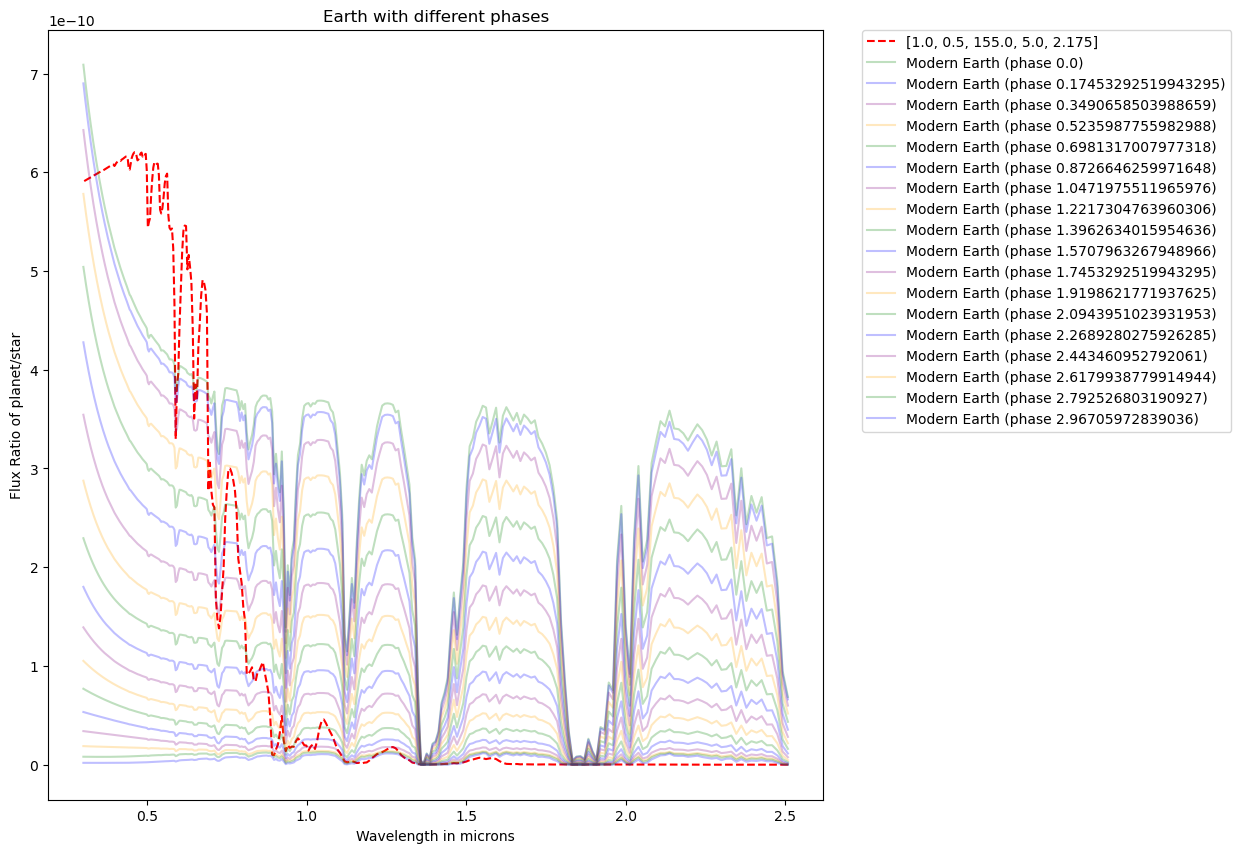

In [16]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_angle = phase_angle_list[:-1]

Optimize.graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=phase_angle, wv_earth_minNep=wv_modern,
                                    minNep_inputs_float=[minNep_inputs_modern_flux1], limit_input=None, type_earth='Modern')

[1.0, 0.5, 155.0, 5.0, 2.175]
1.0 0.5 160 5 2.0943951023931953
3456 3456
Cases with clouds totaled: 3456
The nearest input in the grid found, [1.0, 0.5, 160, 5, 2.0943951023931953], did not have clouds.
False
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given t

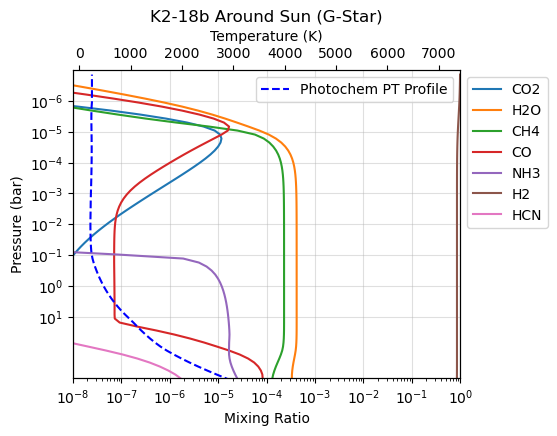

In [17]:
Optimize.plot_photochem_model_with_cloud(minNep_inputs=[minNep_inputs_modern_flux1])

### Archean Earth

In [18]:
fpfs_dict_archean_flux1 = Optimize.calc_objective_dict(wv_earth=wv_archean, fpfs_earth=fpfs_archean, resolution=5, total_flux_list=[1.0])

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given

In [19]:
minNep_inputs_archean_flux1, fpfs_values_min_archean_flux1, index_min_archean_flux1 = Optimize.vec_norm_fpfs_minimized(fpfs_dict=fpfs_dict_archean_flux1)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
 This is the length right before plotting mini Neptunes: (1, 1)


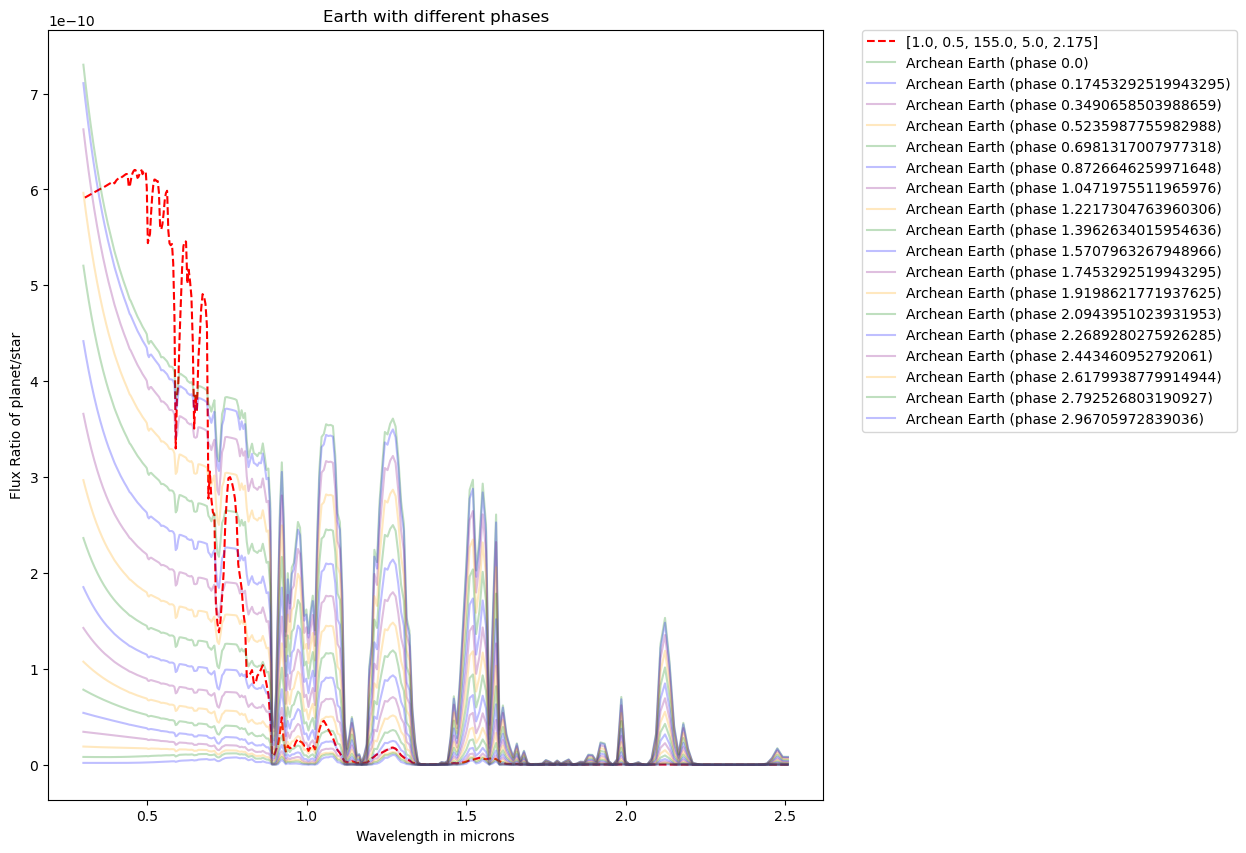

In [20]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_angle = phase_angle_list[:-1]

Optimize.graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=phase_angle, wv_earth_minNep=wv_archean,
                                    minNep_inputs_float=[minNep_inputs_archean_flux1], limit_input=None, type_earth='Archean')

[1.0, 0.5, 155.0, 5.0, 2.175]
1.0 0.5 160 5 2.0943951023931953
3456 3456
Cases with clouds totaled: 3456
The nearest input in the grid found, [1.0, 0.5, 160, 5, 2.0943951023931953], did not have clouds.
False
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given t

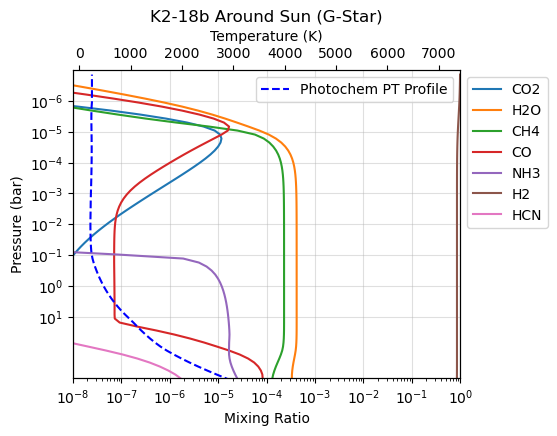

In [21]:
Optimize.plot_photochem_model_with_cloud(minNep_inputs=[minNep_inputs_archean_flux1])

## Limiting output to single flux value and wavelength (4 cases)
- Flux 1x Solar, or the HZ range being 0.95 - 1.67 AU, based on calculations below this translates to 0.36 - 1.1 total flux.
- Wavelength .87 - 1.05 microns where they were searching for water or .5 - .6 microns for initial detection (TBD)

In [22]:
solar_luminosity = (3.83 * (10**26)) # Watts
earth_distance = 1.496e+11 # m of Earth
distance_167 = 1.67 * 1.496e+11 # converted to m from AU
distance_95 = 0.95 * 1.496e+11 # converted to m from AU

In [23]:
def total_flux(solar_luminosity, distance):
    total_flux = (solar_luminosity / (4*np.pi*(distance**2))) # in Watts/m2
    return total_flux

total_flux_earth = total_flux(solar_luminosity=solar_luminosity, distance=earth_distance) # in Watts/m2
total_flux_minNep_167 = total_flux(solar_luminosity=solar_luminosity, distance=distance_167) # in Watts/m2
total_flux_minNep_95 = total_flux(solar_luminosity, distance=distance_95) # in Watts/m2

total_flux_minNep_95_solarunit = total_flux_minNep_95/total_flux_earth
total_flux_minNep_167_solarunit = total_flux_minNep_167/total_flux_earth

print(total_flux_earth, total_flux_minNep_95_solarunit, total_flux_minNep_167_solarunit)

1361.838860941922 1.1080332409972296 0.35856430850873106


In [24]:
total_flux_list = np.linspace(0.36, 1.1, 5)

### Modern Earth

In [25]:
fpfs_dict_modern_HZflux = Optimize.calc_objective_dict(wv_earth=wv_modern, fpfs_earth=fpfs_modern, resolution=5, total_flux_list=total_flux_list)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A matc

In [26]:
minNep_inputs_modern_HZflux, fpfs_values_min_modern_HZflux, index_min_modern_HZflux = Optimize.vec_norm_fpfs_minimized(fpfs_dict=fpfs_dict_modern_HZflux)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
 This is the length right before plotting mini Neptunes: (1, 1)


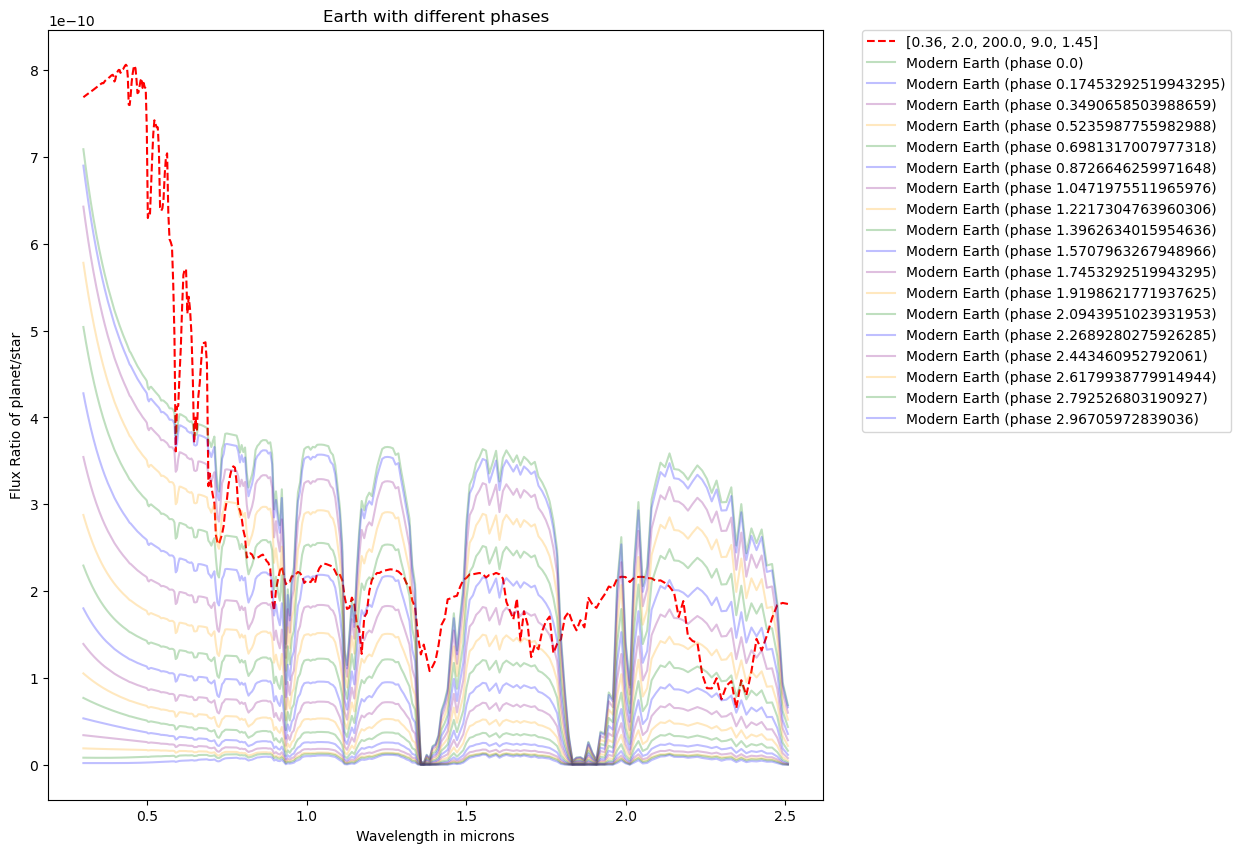

In [27]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_angle = phase_angle_list[:-1]

Optimize.graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=phase_angle, wv_earth_minNep=wv_modern,
                                    minNep_inputs_float=[minNep_inputs_modern_HZflux], limit_input=None, type_earth='Modern')

[0.36, 2.0, 200.0, 9.0, 1.45]
0.5 2.0 200 9 1.3962634015954636
3456 3456
Cases with clouds totaled: 3456
The nearest input in the grid found, [0.5, 2.0, 200, 9, 1.3962634015954636], did have clouds.
True
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total 

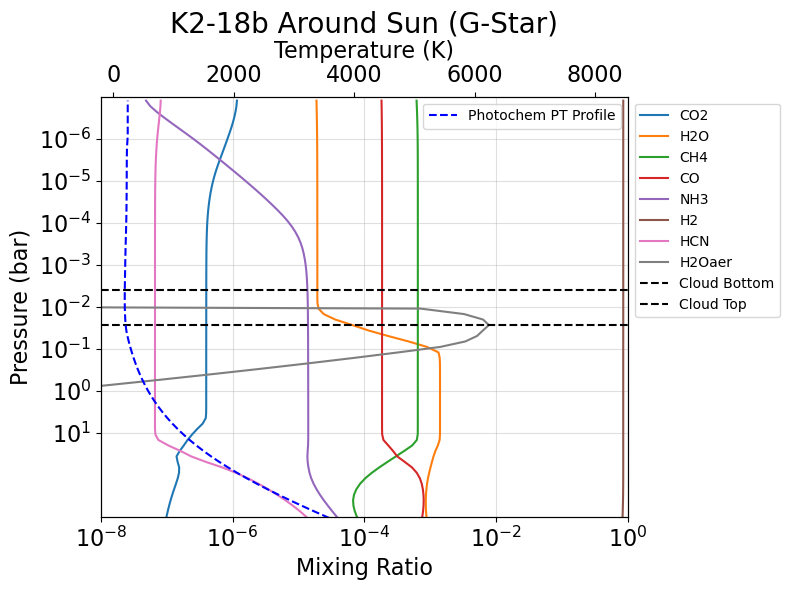

In [28]:
Optimize.plot_photochem_model_with_cloud(minNep_inputs=[minNep_inputs_modern_HZflux])

### Archean Earth

In [29]:
fpfs_dict_archean_HZflux = Optimize.calc_objective_dict(wv_earth=wv_archean, fpfs_earth=fpfs_archean, resolution=5, total_flux_list=total_flux_list)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A matc

In [30]:
minNep_inputs_archean_HZflux, fpfs_values_min_archean_HZflux, index_min_archean_HZflux = Optimize.vec_norm_fpfs_minimized(fpfs_dict=fpfs_dict_archean_HZflux)

Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3, 18)
Length of interpolated fpfs vs wno: 319, 319, 319
 This is the length right before plotting mini Neptunes: (1, 1)


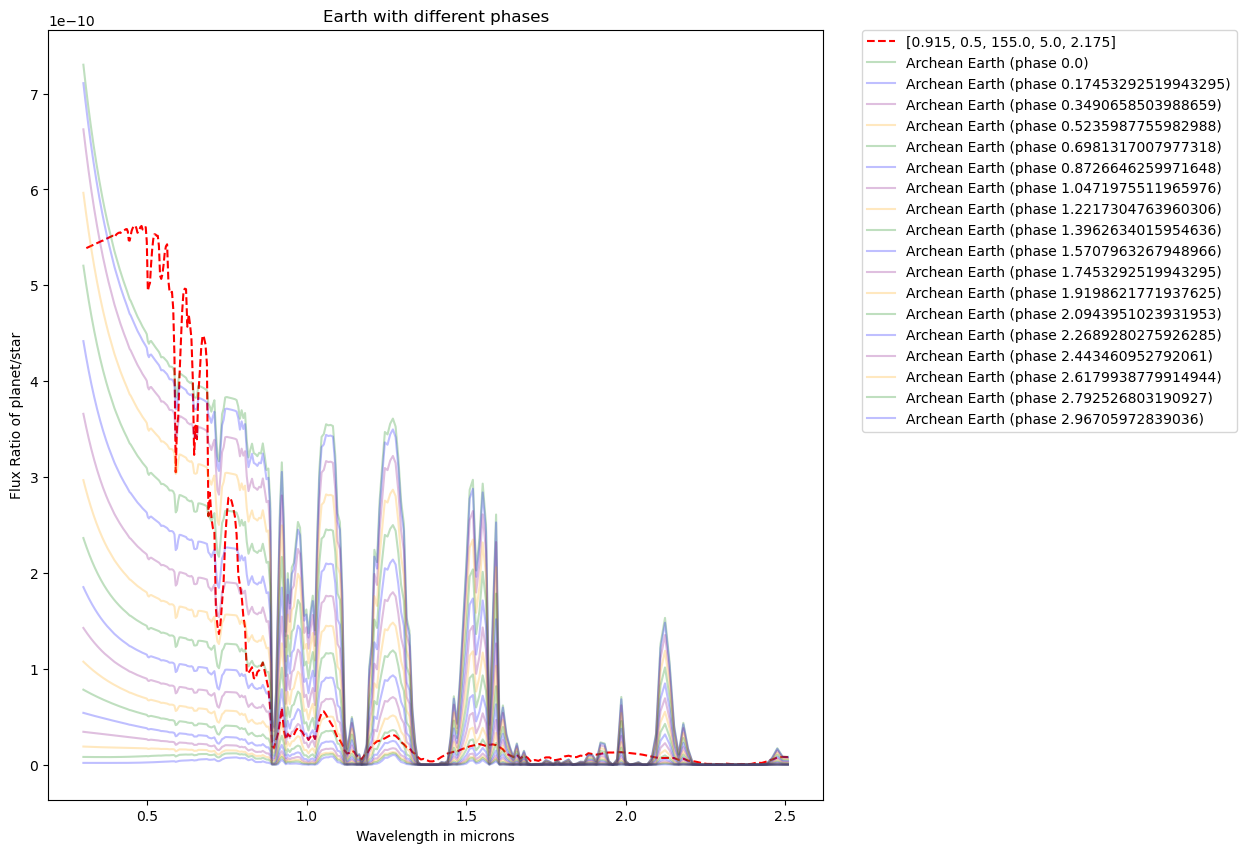

In [31]:
phase_angle_list = np.linspace(0, np.pi, 19)
phase_angle = phase_angle_list[:-1]

Optimize.graph_RSM_arc_mod_earthphase_minNep(filename='earth_diff_phases.pkl', phase_earth=phase_angle, wv_earth_minNep=wv_archean,
                                    minNep_inputs_float=[minNep_inputs_archean_HZflux], limit_input=None, type_earth='Archean')

[0.915, 0.5, 155.0, 5.0, 2.175]
1.0 0.5 160 5 2.0943951023931953
3456 3456
Cases with clouds totaled: 3456
The nearest input in the grid found, [1.0, 0.5, 160, 5, 2.0943951023931953], did not have clouds.
False
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s.
A match given total flux, planet metallicity, and tint does not exist
Interpolating results...
This is the gridshape: (5, 4, 8, 3)
Make sure your inputs are within the following ranges, total_flux: 0.1 - 2.0 xsolar, planet metallicity: 0.5 - 2.0 xsolar, tint: 20 - 200 K, kzz: 5 - 9 log10 of cm^2/s, phase: 0.0 - 2.96705972839036 radians.
A match given

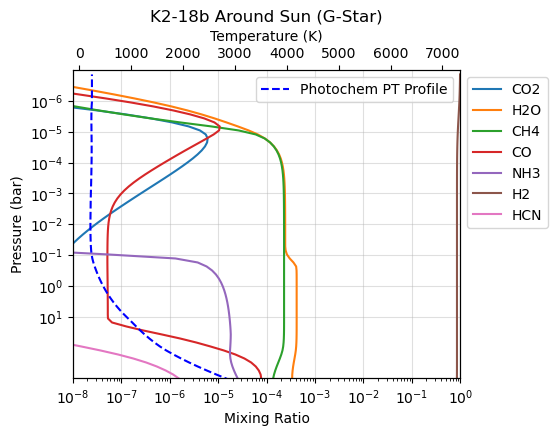

In [32]:
Optimize.plot_photochem_model_with_cloud(minNep_inputs=[minNep_inputs_archean_HZflux])

In [34]:
# This didn't include a cloud b/c H2Oaer was lower in abundance than e-38. 